In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nZWPsNxW55cenzCDFaks")
project = rf.workspace("roboflow-100").project("vehicles-q0x2v")
dataset = project.version(2).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=259dfd019a042b557d594b54c8fb49d5d3dcadcf62b5d8a5ca08e3bd4c827e59
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.

Extracting Dataset Version Zip to vehicles-2 in yolov8:: 100%|██████████| 8128/8128 [00:02<00:00, 3783.47it/s]


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.0/613.0 kB 7.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
results = model.train(data=r'/content/data.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [ ]:
import os
import shutil
from zipfile import ZipFile
from IPython.display import FileLink
# Replace these with your actual paths
folder_path = r"/content/runs"
rar_filename = "runs_1.rar"

# Compress the folder into a RAR archive
shutil.make_archive(rar_filename, 'zip', folder_path)

# Rename the ZIP archive to RAR (if needed)
os.rename(f"{rar_filename}.zip", f"{rar_filename}")

# Provide the download link
display(FileLink(rar_filename, result_html_prefix="Click to download: "))


/content/runs_1.rar

In [ ]:
from google.colab import files
from PIL import Image,ImageDraw
import torch
from torchvision import transforms
import torchvision.ops as ops
# Upload the image you want to perform object detection on
uploaded = files.upload()

# Process the uploaded image
img_path = list(uploaded.keys())[0]
img = Image.open(img_path)

# Perform object detection using the loaded YOLO model
results = model(img)


# Extract bounding box coordinates and scores
for r in results:
    boxes = r.boxes
    scores = r.boxes.conf.squeeze()

    # Apply non-maximum suppression (NMS)
    keep = ops.nms(boxes, scores, iou_threshold=0.45)

    for idx in keep:
        x1, y1, x2, y2 = boxes[idx].xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Draw bounding box on the image
        draw = ImageDraw.Draw(img)
        draw.rectangle([x1, y1, x2, y2], outline="red", width=2)

# Display the image with drawn bounding boxes





0: 480x640 2 big buss, 2 big trucks, 8 cars, 5 small trucks, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


Saving adit_mp4-164_jpg.rf.9091363d9ae472c294ed1b57b838693f.jpg to adit_mp4-164_jpg.rf.9091363d9ae472c294ed1b57b838693f.jpg


RuntimeError: ignored

In [ ]:
resuk

AttributeError: ignored

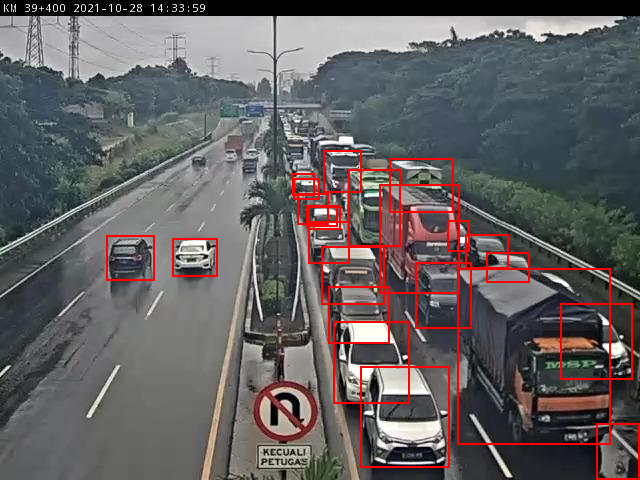

In [ ]:
img